Basic Statistical analysis in HealthCare

This is an exercose for statistical description and analysis, the goal on this one was be able to extract and show high value information.

The Data was obtained via people survey on disease of covid 19.

Specific skills to show
 
 Data Download
 Data Preparation
 Statistical analysis
 Data visualization
# First Stage Show data
 Indexing of key fields
 
 Working with dtype datetime
 
 Parser function to automatically create fields for index
# Second Stage pre preparate data for analysis
 Dealing missing data
 
 Replacement and change of cell data
 
 Changes the data types 
# Final Stage Statistical analysis
 Basic Statistical indicators
 
 Data Sorting and grouping
 
 Data transformation DataSet
 
 Statistical indicators on transformed data

Packages installation and import libraries

In [1]:
!pip install openpyxl

In [65]:
import openpyxl
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Read excel file

In [17]:
df=pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1')

In [18]:
df

,Date time,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
0,2020-09-20 11:23:15.000,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,Yes,Yes,No,No,38.1
1,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,No,Yes,No,No,37.0
2,2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,Yes,No,37.8
3,2020-09-20 11:23:15.000,40-65,Male (Чоловік),"Ukraine, Chernivtsi",No,No,<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,No,Yes,No,No,NaN
4,2020-09-20 11:23:15.000,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,No,Yes,Yes,No,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2021-03-02 09:56:35.956,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.3
3304,2021-03-02 10:10:18.976,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,Yes,Yes,Maybe (можливо),No,37.4
3305,2021-03-04 11:03:43.786,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,No,Yes,Maybe (можливо),No,37.7
3306,2021-03-04 11:04:30.416,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,No,Yes,Maybe (можливо),No,38.0


# First write a parse function to set datetiem as index and get the proper format

In [19]:
pd.to_datetime(df['Date time'])
df.dtypes

Date time                                datetime64[ns]
Age                                              object
Gender                                           object
Region                                           object
Do you smoke?                                    object
Have you had Covid`19 this year?                 object
IgM level                                        object
IgG level                                        object
Blood group                                     float64
Do you vaccinated influenza?                     object
Do you vaccinated tuberculosis?                  object
Have you had influenza this year?                object
Have you had tuberculosis this year?             object
Maximum body temperature                        float64
dtype: object

In [20]:
df.set_index('Date time', inplace=True)

#Data preparation

Here we deal with missing values like gender, and map some other formats that python can misinterorets 

In [21]:
df=df.dropna(subset=['Gender','Age','Maximum body temperature'])

In [23]:
d={'No':False,'Yes':True}
df.loc[:,'Do you vaccinated influenza?']=df['Do you vaccinated influenza?'].map(d)

/tmp/ipykernel_75879/3175750347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Do you vaccinated influenza?']=df['Do you vaccinated influenza?'].map(d)


In [24]:
df

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-20 11:23:15.000,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),2.0,NaN,Yes,No,No,38.1
2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Chernivtsi",No,Yes,>1.1 (positive/позитивний),0.9-1.1 (indefinable/невизначений),2.0,NaN,Yes,No,No,37.0
2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),<0.9 (negative/негативний),<0.9 (negative/негативний),2.0,NaN,Yes,Yes,No,37.8
2020-09-20 11:23:15.000,16-22,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Yes,>1.1 (positive/позитивний),<0.9 (negative/негативний),1.0,NaN,Yes,Yes,No,37.4
2020-09-20 11:23:15.000,23-40,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe,<0.9 (negative/негативний),0.9-1.1 (indefinable/невизначений),1.0,NaN,Yes,Maybe (можливо),No,38.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 09:56:35.956,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,NaN,Yes,Maybe (можливо),No,37.3
2021-03-02 10:10:18.976,40-65,Female (Жінка),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,2.0,NaN,Yes,Maybe (можливо),No,37.4
2021-03-04 11:03:43.786,40-65,Male (Чоловік),"Ukraine, Lviv (Львів)",No,Maybe (можливо),NaN,NaN,1.0,NaN,Yes,Maybe (можливо),No,37.7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1528 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16.644000
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1528 non-null   object 
 1   Gender                                 1528 non-null   object 
 2   Region                                 1519 non-null   object 
 3   Do you smoke?                          1512 non-null   object 
 4   Have you had Covid`19 this year?       1527 non-null   object 
 5   IgM level                              1476 non-null   object 
 6   IgG level                              1492 non-null   object 
 7   Blood group                            1519 non-null   float64
 8   Do you vaccinated influenza?           0 non-null      object 
 9   Do you vaccinated tuberculosis?        1527 non-null   object 
 10  Have you had influenza this y

#Categorize Age 

In [27]:
df.loc[:,'Age']=df['Age'].astype('category')


/tmp/ipykernel_75879/3792794740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Age']=df['Age'].astype('category')


In [28]:
df['Age']

Date time
2020-09-20 11:23:15.000    40-65
2020-09-20 11:23:15.000    23-40
2020-09-20 11:23:15.000    23-40
2020-09-20 11:23:15.000    16-22
2020-09-20 11:23:15.000    23-40
                           ...  
2021-03-02 09:56:35.956    40-65
2021-03-02 10:10:18.976    40-65
2021-03-04 11:03:43.786    40-65
2021-03-04 11:04:30.416    40-65
2021-04-05 03:18:16.644    16-22
Name: Age, Length: 1528, dtype: category
Categories (5, object): ['0-15', '16-22', '23-40', '40-65', '>65']

# In this part the Cyrilic values were removed and those fields were categorized  

In [29]:
for c in df.columns[1:-1]:
    df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else str(x)[:str(x).find('(')] ).astype('category')

/tmp/ipykernel_75879/891171820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else str(x)[:str(x).find('(')] ).astype('category')
/tmp/ipykernel_75879/891171820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else str(x)[:str(x).find('(')] ).astype('category')
/tmp/ipykernel_75879/891171820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

# Now make sure the Dtypes are correct and get a basic statistical info

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1528 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16.644000
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    1528 non-null   category
 1   Gender                                 1528 non-null   category
 2   Region                                 1528 non-null   category
 3   Do you smoke?                          1528 non-null   category
 4   Have you had Covid`19 this year?       1528 non-null   category
 5   IgM level                              1528 non-null   category
 6   IgG level                              1528 non-null   category
 7   Blood group                            1528 non-null   category
 8   Do you vaccinated influenza?           1528 non-null   category
 9   Do you vaccinated tuberculosis?        1528 non-null   category
 10  Have you had infl

In [31]:
df.describe()

,Maximum body temperature
count,1528.000000
mean,37.710013
std,0.634532
min,36.600000
25%,37.200000
50%,37.700000
75%,38.300000
max,38.800000


In [32]:
df.describe(include=['category'])

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?
count,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528
unique,5,2,7,3,4,4,5,5,1,5,5,4
top,40-65,Female,"Ukraine, Lviv",No,Yes,<0.9,<0.9,2.0,nan,Yes,No,No
freq,637,1057,1446,1263,975,908,1024,707,1528,1240,1015,1517


# Statistical Analysis

 >Just to beging we can see the distribution of the ages of people that cpmpleted the survey

In [33]:
df['Age'].value_counts()

40-65    637
23-40    562
16-22    203
>65      117
0-15       9
Name: Age, dtype: int64

In [34]:
df['Age'].value_counts(normalize=True)

40-65    0.416885
23-40    0.367801
16-22    0.132853
>65      0.076571
0-15     0.005890
Name: Age, dtype: float64

# Sorting 

In [35]:
df.sort_values(by='Age',ascending=True)

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-12-19 03:49:02.589,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,1.0,nan,Yes,Maybe,No,36.9
2020-12-19 03:49:02.589,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,1.0,nan,Yes,Maybe,No,36.6
2020-12-19 01:28:54.767,0-15,Female,"Ukraine, Lviv",No,nan,<0.9,>1.1,1.0,nan,Yes,No,No,38.5
2020-12-28 16:27:57.830,0-15,Male,"Ukraine, Lviv",No,Yes,<0.9,>1.1,3.0,nan,Yes,No,No,37.5
2020-12-28 16:27:57.830,0-15,Male,"Ukraine, Lviv",No,Yes,<0.9,>1.1,3.0,nan,Yes,No,No,37.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 14:35:29.074,>65,Male,"Ukraine, Lviv",No,Yes,<0.9,>1.1,2.0,nan,Yes,No,No,37.8
2020-12-24 14:17:23.874,>65,Female,"Ukraine, Lviv",No,Yes,>1.1,<0.9,1.0,nan,Yes,Yes,No,38.7
2020-12-17 19:46:53.015,>65,Female,"Ukraine, Lviv",No,Yes,<0.9,<0.9,1.0,nan,Yes,No,No,37.0


In [36]:
df.sort_values(by=['Age','Gender'],ascending=[True,False])

,Age,Gender,Region,Do you smoke?,Have you had Covid`19 this year?,IgM level,IgG level,Blood group,Do you vaccinated influenza?,Do you vaccinated tuberculosis?,Have you had influenza this year?,Have you had tuberculosis this year?,Maximum body temperature
Date time,,,,,,,,,,,,,
2020-09-26 11:42:15.000,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,0.9-1.1,1.0,nan,Yes,Maybe,No,38.7
2020-12-19 03:49:02.589,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,1.0,nan,Yes,Maybe,No,36.9
2020-12-19 03:49:02.589,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,1.0,nan,Yes,Maybe,No,36.6
2020-12-24 16:42:33.590,0-15,Male,"Ukraine, Lviv",No,Maybe,<0.9,<0.9,1.0,nan,Yes,Maybe,No,36.6
2020-12-28 16:27:57.830,0-15,Male,"Ukraine, Lviv",No,Yes,<0.9,>1.1,3.0,nan,Yes,No,No,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 14:38:38.093,>65,Female,"Ukraine, Lviv",No,Yes,>1.1,<0.9,1.0,nan,Yes,No,No,37.2
2020-12-30 15:29:36.359,>65,Female,Other,nan,Yes,>1.1,<0.9,1.0,nan,Yes,No,No,38.0
2021-02-16 10:08:13.109,>65,Female,"Ukraine, Lviv",No,Maybe,nan,nan,nan,nan,Yes,No,Yes,37.6


# Data transformation
> Here i want to obtaininformation on a specific category field

In [37]:
df['Gender'].value_counts()

Female     1057
Male        471
Name: Gender, dtype: int64

In [38]:
df['Gender'].value_counts().keys()

CategoricalIndex(['Female ', 'Male '], categories=['Female ', 'Male '], ordered=False, dtype='category')

In [48]:
df[df['Gender'] == 'Female ']['Maximum body temperature'].mean()

37.70652790917687

In [52]:
df[(df['Gender'] == 'Male ') & (df['Do you smoke?'] == 'Yes') & (df['Have you had Covid`19 this year?'] == 'Yes')]['Maximum body temperature'].max()

38.8

In [53]:
df.groupby(['Gender'])['Maximum body temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1057.0,37.706528,0.625307,36.6,37.2,37.7,38.2,38.8
Male,471.0,37.717834,0.655371,36.6,37.1,37.7,38.3,38.8


In [54]:
df.groupby(['Age'])['Maximum body temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-15,9.0,37.555556,0.777996,36.6,36.9,37.5,38.0,38.7
16-22,203.0,37.746305,0.628548,36.6,37.2,37.7,38.3,38.8
23-40,562.0,37.757473,0.626585,36.6,37.2,37.8,38.3,38.8
40-65,637.0,37.681947,0.633502,36.6,37.1,37.7,38.2,38.8
>65,117.0,37.583761,0.660193,36.6,37.0,37.6,38.2,38.8


# Pivot tables 

In [56]:
pd.crosstab(df['Age'],df['Gender'])

Gender,Female,Male
Age,,
0-15,1,8
16-22,152,51
23-40,359,203
40-65,496,141
>65,49,68


In [63]:
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)


Gender,Female,Male,All
Age,,,
0-15,38.500000,37.437500,37.555556
16-22,37.731579,37.790196,37.746305
23-40,37.759053,37.754680,37.757473
40-65,37.679435,37.690780,37.681947
>65,37.502041,37.642647,37.583761
All,37.706528,37.717834,37.710013


# Visualization

<AxesSubplot:xlabel='Age', ylabel='count'>

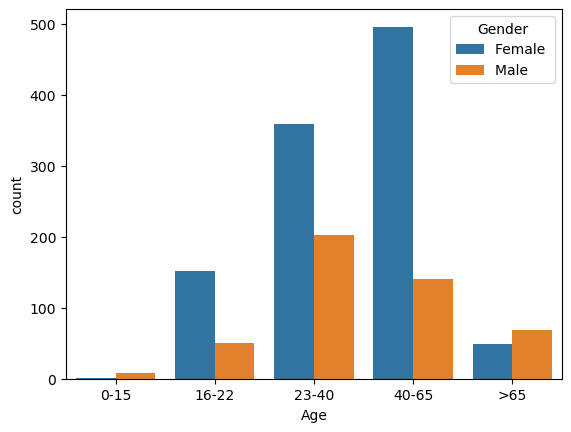

In [66]:
sns.countplot(x='Age', hue='Gender',data=df)

<AxesSubplot:xlabel='Date time'>

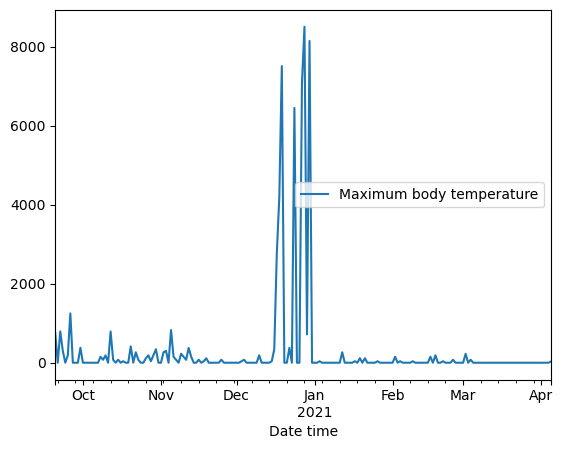

In [67]:
df.resample(str('1D')).sum().plot()

/home/andres/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andres/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum body temperature', ylabel='Density'>

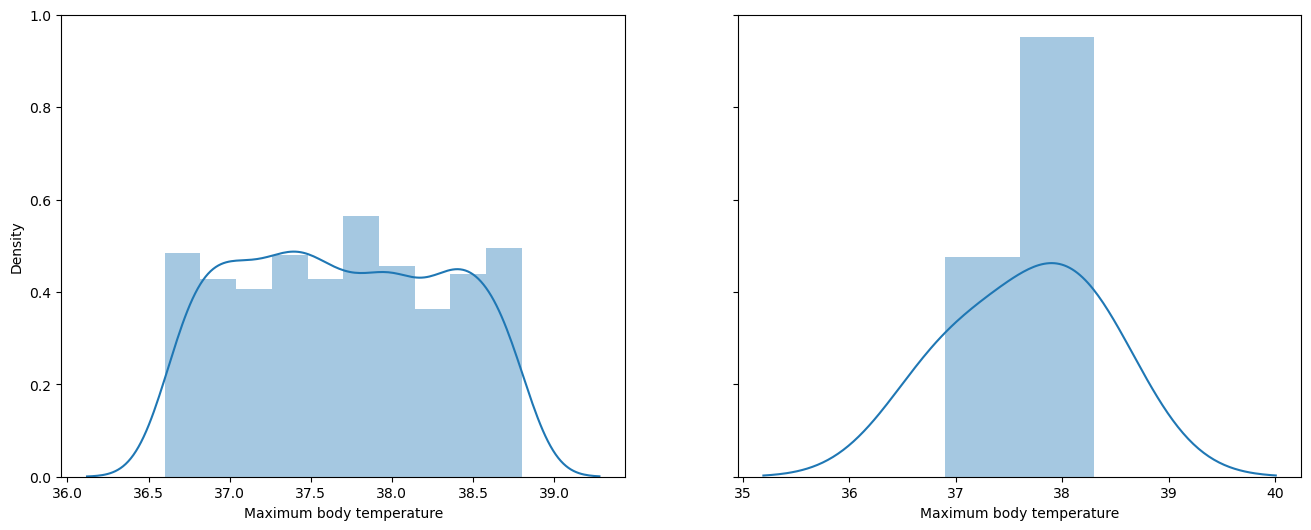

In [68]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

df_t = df[df['Have you had Covid`19 this year?'] == 'Yes'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[0])
df_t = df[df['Have you had Covid`19 this year?'] == 'Maybe'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[1])

<AxesSubplot:xlabel='Maximum body temperature', ylabel='Age'>

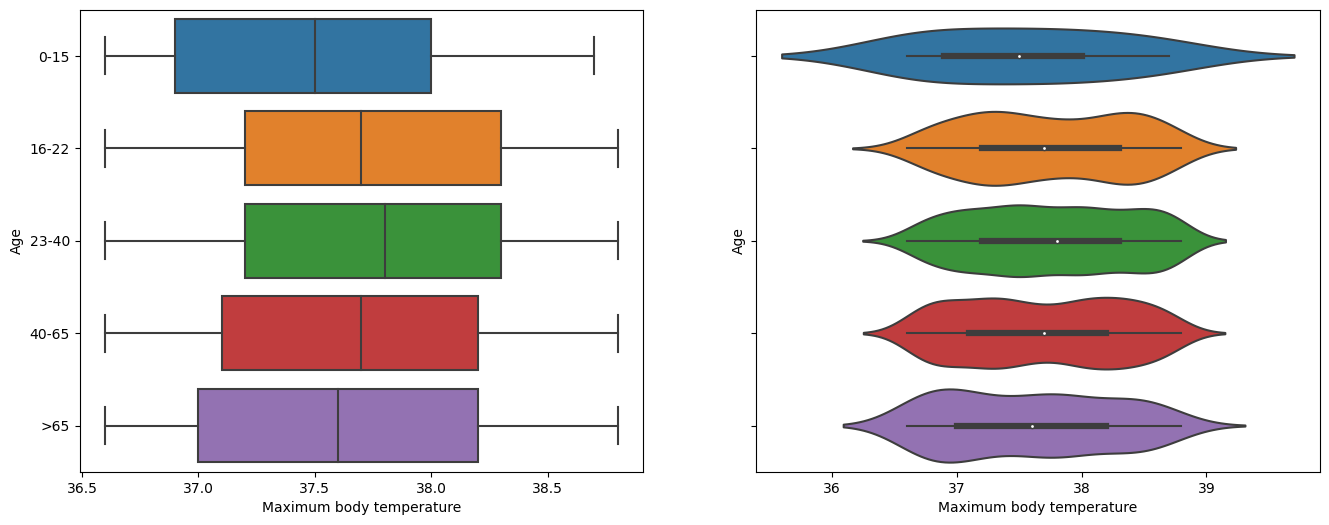

In [71]:
cols = ['Maximum body temperature', 'Maximum body temperature']
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(y = df["Age"], x=df["Maximum body temperature"], ax=axes[0])
sns.violinplot(y = df["Age"], x=df["Maximum body temperature"],ax=axes[1] )